In [ ]:
import torch
from transformers import Blip2Processor, Blip2ForConditionalGeneration
from tqdm import tqdm
from PIL import Image
from torch.utils.data import DataLoader

# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load BLIP-2 model and processor
processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-6.7b")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-6.7b")

# Ensure the model is on the correct device
model = model.to(device)

preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/127k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/9.80G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/9.93G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/9.93G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/2.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [4]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

total_params = count_parameters(model)
print(f"Total trainable parameters: {total_params}")

Total trainable parameters: 3744679936


In [9]:
vision_params = count_parameters(model.vision_model)
qformer_params = count_parameters(model.qformer)
language_params = count_parameters(model.language_model)

print(f"Vision model parameters: {vision_params}")
print(f"QFormer parameters: {qformer_params}")
print(f"Language model parameters: {language_model_params}")

Vision model parameters: 985952256
QFormer parameters: 105137664
Language model parameters: 2651596800


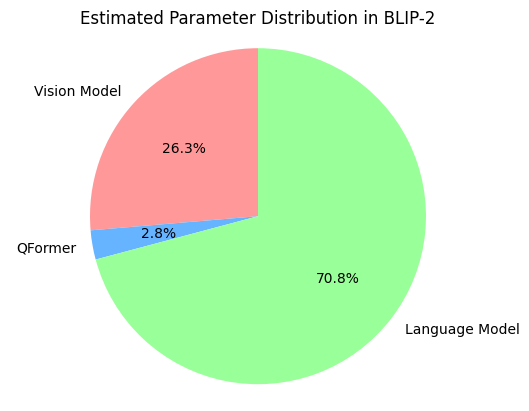

In [10]:
import matplotlib.pyplot as plt

# Create data for the pie chart
sizes = [vision_params, qformer_params, language_params]
labels = ['Vision Model', 'QFormer', 'Language Model']
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.title('Estimated Parameter Distribution in BLIP-2')
plt.show()

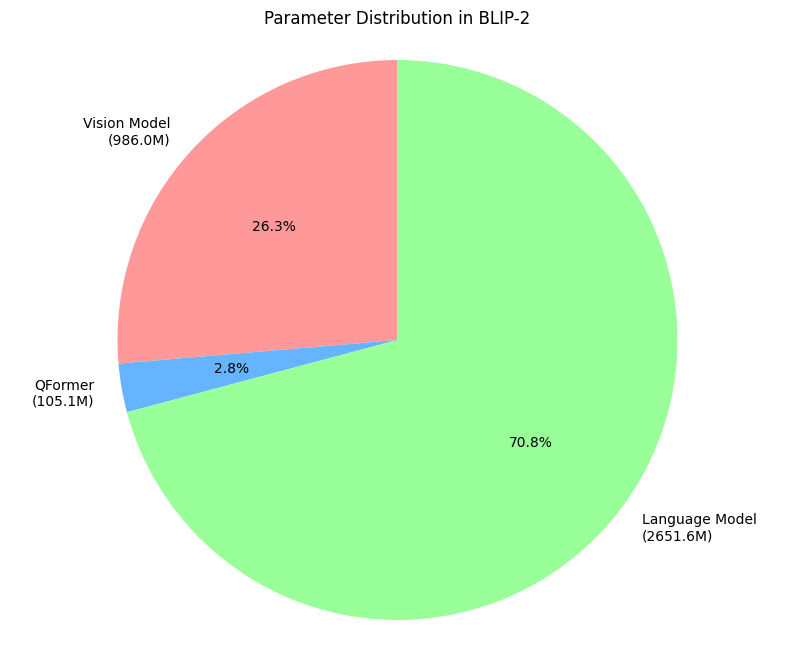

In [14]:
import matplotlib.pyplot as plt


# Create data for the pie chart
sizes = [vision_params, qformer_params, language_params]
labels = ['Vision Model', 'QFormer', 'Language Model']
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Function to format parameter counts
def format_params(size):
    if size >= 1000000:
        return f'{size/1000000:.1f}M'
    else:
        return f'{size:.1f}M'

# Add formatted parameter counts to labels
labels = [f'{label}\n({format_params(size)})' for label, size in zip(labels, sizes)]

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, labeldistance=1.1)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.title('Parameter Distribution in BLIP-2')
plt.show()

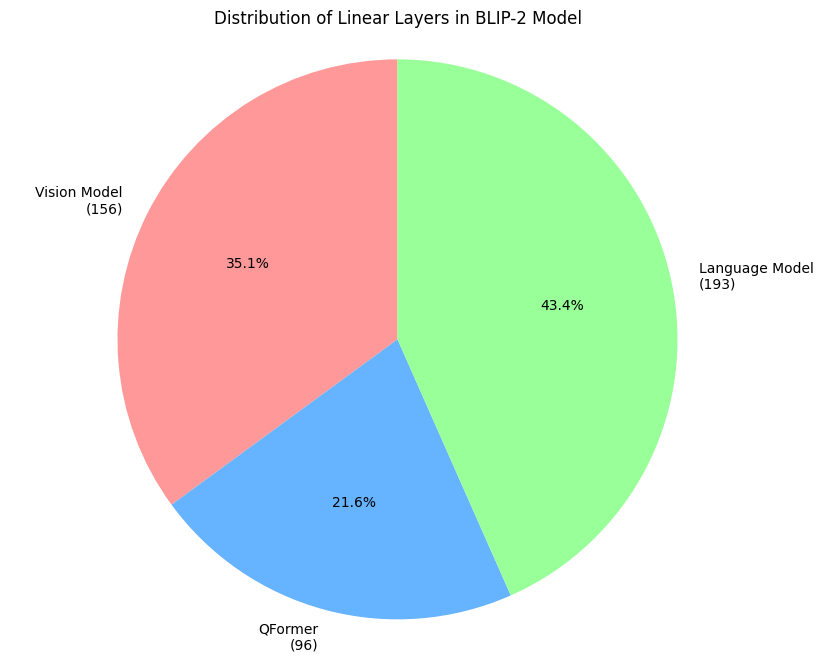

In [16]:
import torch
from transformers import Blip2ForConditionalGeneration
import matplotlib.pyplot as plt

def count_linear_layers(module):
    linear_count = 0
    for child in module.children():
        if isinstance(child, torch.nn.Linear):
            linear_count += 1
        else:
            linear_count += count_linear_layers(child)
    return linear_count

def analyze_blip2_model(model):
    components = [
        ('Vision Model', model.vision_model),
        ('QFormer', model.qformer),
        ('Language Model', model.language_model)
    ]

    counts = []
    labels = []

    for name, component in components:
        linear_count = count_linear_layers(component)
        counts.append(linear_count)
        labels.append(f'{name}\n({linear_count})')

    return counts, labels

counts, labels = analyze_blip2_model(model)

# Create pie chart
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.title('Distribution of Linear Layers in BLIP-2 Model')
plt.show()